# CS4320 Introduction to Machine Learning

## A Template for the Course Project Submssion

Note: This template is optional. You can design your Jupyter Notebook structure based on your competition and preference. However, we expect you practice as many machine learning skills you learned in this course as possible.

**Please type your group name here:**

In [470]:
GroupName = "OceanGate"
assert GroupName != "", 'Please enter your name in the above quotation marks, thanks!'

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Submit the predictions to Kaggle](#13)
14. [Your takeaway from the course](#14)

## Submission instructions <a name="si"></a>
<hr>

- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Upload the .ipynb file to Canvas.
- **Submit the screenshot of your Kaggle submission ranking and score** 
- Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
- Notebooks with cell execution numbers out of order will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
- Make sure that the plots and output are rendered properly in your submitted file. 
- Please keep your notebook clean and delete any throwaway code.

## Introduction <a name="in"></a>

A few notes and tips when you work on this project: 

#### Tips
1. The project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


## Setup

In [471]:
# Sklearn stuff
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate

# Other
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 

_Type your answer here, replacing this text._

In [472]:
# Your code here

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

**Your tasks:**

1. Split the data into train and test portions.

In [473]:
# test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
# train_df = pd.read_csv('/kaggle/input/titanic/train.csv')

test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

target = "Survived"
X = train_df.drop(columns=[target])
y = train_df[target]

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


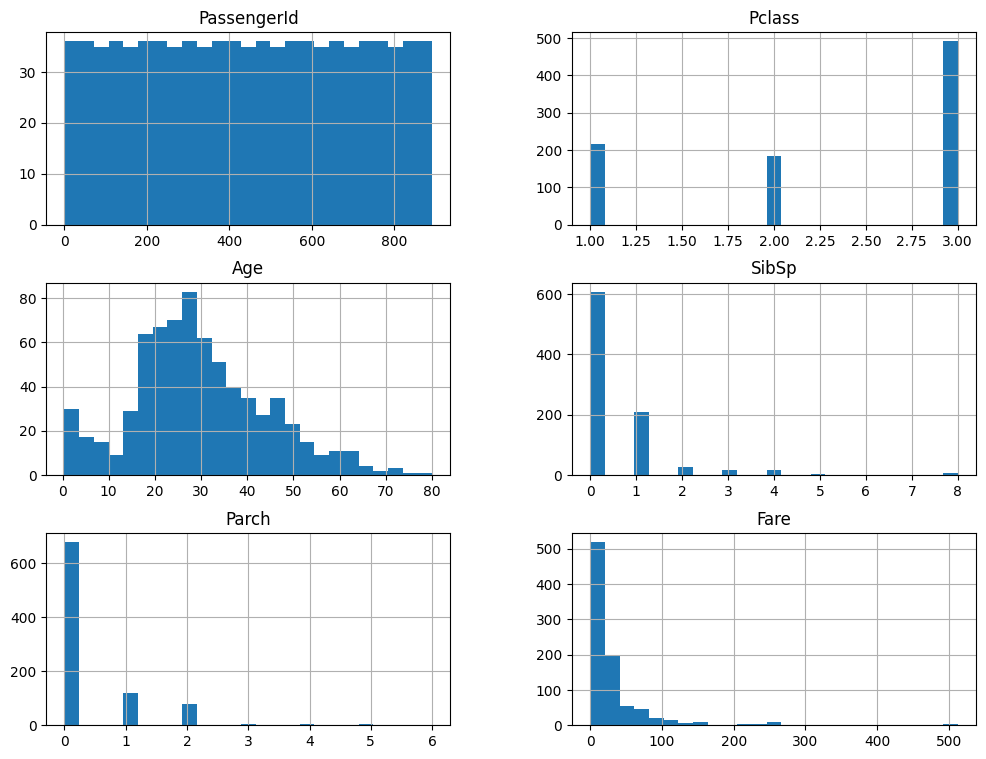

In [474]:
X.info()
X.hist(bins=25, figsize=(12,9))
X.describe(include="all")

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set. You may have to go back and forth between feature engineering and preprocessing. Briefly explain why you come up with these new features.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [476]:
def get_total_relatives(df: pd.DataFrame):
    df["TotalRelatives"] = df["SibSp"] + df["Parch"]
    return df[["TotalRelatives"]]

numeric_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)
numeric_features = ["Age", "Pclass"]

categorical_pipe = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="missing"),
    OneHotEncoder(handle_unknown="ignore")
)
categorical_features = ["Embarked"] 
binary_features = ["Sex"] 
drop_features = ["PassengerId", "Name", "Ticket", "Fare", "Cabin"]
passthrough_features = []

def f(self, in_feats):
    return ["TotalRelatives"]

preprocessor = make_column_transformer(
    (
        FunctionTransformer(get_total_relatives, validate=False, feature_names_out=f),
        ["SibSp", "Parch"]
    ),
    (numeric_pipe, numeric_features),
    (categorical_pipe, categorical_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    ("drop", drop_features),
    ("passthrough", passthrough_features)
)

res = preprocessor.fit_transform(X, y)
pd.DataFrame(res, columns=preprocessor.get_feature_names_out())

,functiontransformer__TotalRelatives,pipeline-1__Age,pipeline-1__Pclass,pipeline-2__Embarked_C,pipeline-2__Embarked_Q,pipeline-2__Embarked_S,pipeline-2__Embarked_missing,onehotencoder__Sex_male
0,1.0,-0.565736,0.827377,0.0,0.0,1.0,0.0,1.0
1,1.0,0.663861,-1.566107,1.0,0.0,0.0,0.0,0.0
2,0.0,-0.258337,0.827377,0.0,0.0,1.0,0.0,0.0
3,1.0,0.433312,-1.566107,0.0,0.0,1.0,0.0,0.0
4,0.0,0.433312,0.827377,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0.0,-0.181487,-0.369365,0.0,0.0,1.0,0.0,1.0
887,0.0,-0.796286,-1.566107,0.0,0.0,1.0,0.0,0.0
888,3.0,-0.104637,0.827377,0.0,0.0,1.0,0.0,0.0
889,0.0,-0.258337,-1.566107,1.0,0.0,0.0,0.0,1.0


In [477]:
preprocessor.get_feature_names_out()

array(['functiontransformer__TotalRelatives', 'pipeline-1__Age',
       'pipeline-1__Pclass', 'pipeline-2__Embarked_C',
       'pipeline-2__Embarked_Q', 'pipeline-2__Embarked_S',
       'pipeline-2__Embarked_missing', 'onehotencoder__Sex_male'],
      dtype=object)

In [478]:
# Stolen from HW3
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [479]:
y.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Based on this, the dummy always predict 0.

In [480]:
results_dict = {}

dummy = DummyClassifier(strategy="most_frequent")
results_dict["dummy"] = mean_std_cross_val_scores(
    dummy, X, y, return_train_score=True
)
pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.001),0.000 (+/- 0.001),0.616 (+/- 0.003),0.616 (+/- 0.001)


In [481]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
predicted = dummy_clf.predict(test_df)

dummy_submit_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': predicted})
dummy_submit_df.to_csv('dummy_submission.csv', index=False)
dummy_submit_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

In [482]:
# Your code here

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>

**Your tasks:**
1. Try other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

In [483]:
models = { # Arbitrary hyperparameters, for now
    "decision tree": DecisionTreeClassifier(max_depth=5), 
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "Decision Forest": RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
}

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    results_dict[name] = mean_std_cross_val_scores(
        pipe, X, y, return_train_score=True
    )

pd.DataFrame(results_dict).T

,fit_time,score_time,test_score,train_score
dummy,0.001 (+/- 0.001),0.000 (+/- 0.001),0.616 (+/- 0.003),0.616 (+/- 0.001)
decision tree,0.014 (+/- 0.001),0.007 (+/- 0.001),0.808 (+/- 0.027),0.846 (+/- 0.008)
KNN,0.012 (+/- 0.000),0.010 (+/- 0.001),0.804 (+/- 0.029),0.826 (+/- 0.006)
Decision Forest,0.026 (+/- 0.006),0.007 (+/- 0.001),0.809 (+/- 0.021),0.843 (+/- 0.008)


In [484]:
tree = make_pipeline(preprocessor, DecisionTreeClassifier(max_depth=5))
tree.fit(X, y)
tree_predicted = tree.predict(test_df)

tree_submit_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': tree_predicted})
tree_submit_df.to_csv('tree_submission.csv', index=False)
tree_submit_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [485]:

knn = make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=10))
knn.fit(X, y)
knn_predicted = knn.predict(test_df)

knn_submit_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': knn_predicted})
knn_submit_df.to_csv('knn_submission.csv', index=False)
knn_submit_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [486]:
decision_forest = make_pipeline(preprocessor, RandomForestClassifier(max_depth=5))
decision_forest.fit(X, y)
decision_forest_predicted = decision_forest.predict(test_df)

decision_forest_submit_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': decision_forest_predicted})
decision_forest_submit_df.to_csv('decision_forest_submission.csv', index=False)
decision_forest_submit_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>

**Your tasks:**

Make some attempts to select relevant features. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it. 

In [487]:
# Your code here

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

In [488]:
# Your code here

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="11"></a>
<hr>

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

In [489]:
# Your code here

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

**Your tasks:**

1. Try your best performing model on the test data (from train test split) and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

In [490]:
# Your code here

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Submit the predictions to Kaggle <a name="13"></a>
<hr>

**Your tasks:**

Retrain the best model on the whole training dataset and upload the predicted output on the test set to Kaggle. Report your final test score.

In [491]:
# Your code here

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="14"></a>
<hr>

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

<!-- END QUESTION -->

<br><br>